# Вебинар 3. Типы данных и циклы. Часть 2


## Проверка связи

Если у вас нет звука:
*   убедитесь, что на вашем устройстве и в колонках включён звук
*   обновите страницу вебинара или закройте страницу и заново присоединитесь к вебинару
*   откройте вебинар в другом браузере
*   перезагрузите ваше устройство и попытайтесь войти снова

Поставьте в чат:
* «+» — если видно и слышно
* «–» — если нет

## О спикере

**Олег Булыгин**
- эксперт по Python и data science;
- занимался аналитикой СМИ, IT-аудитом в финтехе;
- работал в научно-производственных компаниях космической отрасли;
- с 2020 года реализую собственные проекты, занимаюсь IT-образованием и консультированием;
- с 2017 года в IT-образовании, стремлюсь сделать обучение качественным и честным для всех, кто хочет развиваться в IT-сфере.

## Правила участия

*   Приготовьте блокнот и ручку, чтобы записывать важные мысли и идеи
*   Продолжительность вебинара — 80 минут
*   Вы можете писать свои вопросы в чате или задавать их вслух
*   Запись вебинара будет доступна в личном кабинете

# Цели занятия

- Познакомиться со структурами данных (списками, словарями, множествами) в Python.
- Рассмотреть принципы работы с list, dict и set comprehensions и их преимущества.
- Научиться работать со словарями, списками и множествами для решения практических задач.

## План занятия

1. List Comprehensions
2. Работа со словарями
3. Множества: скорость и логические операции
4. Классическая ошибка: итерация с изменением коллекции
5. Разбор кейса. Анализ данных из iTunes API

## 1. List comprehensions

Вспомним синтаксис:
```
new_list = [expression(element) for element in some_obj if condition]
```
В квадратные скобки мы записываем выражение, которое будет исполняться для каждого элемента в итерируемом объекте. Из результатов этих действий и будет состоять новый список.


Представьте, что у вас есть фрагмент лога доступа.

**Задача:** необходимо быстро извлечь все IP-адреса.

In [ ]:
log_lines = [
    '192.168.1.1 - - [10/Mar/2024:13:55:36 +0000] "GET /index.html HTTP/1.1" 200 2500',
    '10.0.0.5 - - [10/Mar/2024:13:56:12 +0000] "POST /login HTTP/1.1" 401 150',
    '203.0.113.45 - - [10/Mar/2024:13:57:01 +0000] "GET /api/data HTTP/1.1" 200 5000',
    '192.168.1.1 - - [10/Mar/2024:13:58:22 +0000] "GET /style.css HTTP/1.1" 200 1200',
    '172.16.31.100 - - [10/Mar/2024:13:59:05 +0000] "GET /favicon.ico HTTP/1.1" 404 100',
    '203.0.113.45 - - [10/Mar/2024:14:00:18 +0000] "POST /api/data HTTP/1.1" 200 5010',
]

**Усложним задачу:** необходимо извлечь только внешние, не приватные IP-адреса; внутренние сети, например 192.168.x.x, 10.x.x.x, 172.16.x.x, не должны быть использованы.

Часто необходимо не отфильтровать элементы, а преобразовать их в зависимости от условия. Вместо громоздкого цикла с `if-else` можно использовать тернарный оператор `value_if_true if condition else value_if_false` прямо в List Comprehension.

In [ ]:
# Пример: rлассификация событий по уровню критичности.
events = ['login_success', 'login_failed', 'file_access', 'login_failed', 'critical_error']

# Задача: создать список с метками 'HIGH' для 'login_failed' и 'critical_error', и 'LOW' для остальных.

event_levels = [
    'HIGH' if event in ['login_failed', 'critical_error'] else 'LOW'
    for event in events
]

print("Уровни критичности событий:", event_levels)

List comprehensions выглядит компактнее, но требует привычки к чтению.

## Ваши вопросы

## 2. Работа со словарями

Если необходимо хранить данные в формате «ключ-значение» (например, имя пользователя -> его ID, товар -> его цена, параметр -> его значение), применяются **словари** (`dict`).

Разберём, как работать со словарями ещё продуктивнее.

Одна из частых операций со словарями – подсчёт элементов или группировка данных.

**Ситуация:** вы получаете события от системы обнаружения вторжений (IDS) в виде списка словарей.

**Задача:** посчитать, сколько событий каждого уровня серьезности (severity) вы зафиксировали.

In [ ]:
# Список событий безопасности
alerts_data = [
    {'alert_id': 'IDS-001', 'source_ip': '203.0.113.45', 'severity': 'High', 'protocol': 'TCP'},
    {'alert_id': 'IDS-002', 'source_ip': '198.51.100.12', 'severity': 'Medium', 'protocol': 'UDP'},
    {'alert_id': 'IDS-003', 'source_ip': '203.0.113.45', 'severity': 'High', 'protocol': 'TCP'},
    {'alert_id': 'IDS-004', 'source_ip': '198.51.100.15', 'severity': 'Low', 'protocol': 'ICMP'},
    {'alert_id': 'IDS-005', 'source_ip': '203.0.113.45', 'severity': 'High', 'protocol': 'TCP'},
    {'alert_id': 'IDS-006', 'source_ip': '198.51.100.12', 'severity': 'Medium', 'protocol': 'TCP'},
]


In [ ]:
# Способ 1: Проверка 'if key not in'
severity_counts = {}
for alert in alerts_data:
    level = alert['severity']
    if level not in severity_counts:
        severity_counts[level] = 0
    severity_counts[level] += 1
print(severity_counts)

In [ ]:
# Способ 2: Метод .get() — более "Pythonic"
# dict.get(key, default_value) вернет default_value, если ключа нет, и не вызовет ошибку
severity_counts_get = {}
for alert in alerts_data:
    level = alert['severity']
    severity_counts_get[level] = severity_counts_get.get(level, 0) + 1
print(severity_counts_get)

### Слияние словарей

Рассмотрим способы объединения словарей.

**Пример:** объединение настроек приложения (пользовательские настройки должны переопределить настройки по умолчанию).

In [ ]:
default_settings = {'theme': 'light', 'notifications': True, 'language': 'ru', 'font_size': 12}
user_settings = {'language': 'en', 'notifications': False, 'show_avatars': True}

# Способ 1: Метод .update()
# Модифицирует исходный словарь
merged_settings_update = default_settings.copy() # Важно скопировать, чтобы не изменить оригинал
merged_settings_update.update(user_settings)

print("Слияние через .update():")
print("  Default:", default_settings) # Оригинал не изменился
print("  User:", user_settings)
print("  Merged:", merged_settings_update) # 'language' и 'notifications' перезаписаны, 'show_avatars' добавлен

In [ ]:
# Способ 2: Оператор | (пайплайн, доступен с Python 3.9+)
# Создает новый словарь, не изменяя исходные
merged_settings_pipe = default_settings | user_settings
print("\nСлияние через оператор |:")
print("  Merged:", merged_settings_pipe)

# Порядок важен: user | default даст другой результ
merged_settings_pipe_reversed = user_settings | default_settings
print("\nСлияние user | default:")
print("  Merged:", merged_settings_pipe_reversed)

# Ключевой момент: при совпадении ключей, значение берётся из второго словаря (того, что правее или передан в update)

В пайплайн можно включать несколько объединений:

In [ ]:
all_setting = default_settings | user_settings | {'mode': 'premium'}
all_setting

### Dict comprehensions: создание словарей
Для словарей, как и для списков, существует собственный comprehension — **dict comprehension**. Это элегантный способ создать новый словарь в одну строку кода.

Синтаксис очень похож на list comprehension, но:
*   используются фигурные скобки `{}`;
*   внутри указывается пара `ключ: значение`, разделённая двоеточием.

```python
{ключ_выражение: значение_выражение for элемент in итерируемый_объект [if условие]}
```

Допустим, у вас есть словарь, и необходимо создать новый, применив определённую операцию к его значениям или ключам.

In [ ]:
# Словарь с ценами товаров в условных единицах
prices = {'laptop': 1200, 'monitor': 300, 'keyboard': 75, 'mouse': 25}
exchange_rate = 100 # Условный курс

# Задача: создать словарь с ценами в другой валюте

# Способ 1: цикл
new_prices = {}
for item, price in prices.items():
    new_prices[item] = round(price * exchange_rate, 2)

new_prices

In [ ]:
# Способ 2: dict comprehension
prices_rub_dc = {item: round(price * exchange_rate, 2) for item, price in prices.items()}
prices_rub_dc

Dict comprehensions, как и list comprehensions, поддерживают необязательное условие `if` для фильтрации элементов.

Предположим, у вас есть словарь с IP-адресами и их репутационными очками.

**Задача:** создать новый словарь, содержащий только высокорисковые IP (например, с оценкой > 80) и преобразовать значение в текстовое описание.

In [ ]:
# Словарь с индикаторами компрометации (IP: reputation_score)
ioc_scores = {
    '203.0.113.45': 95,
    '198.51.100.12': 50,
    '8.8.8.8': 10, # Google DNS, низкий риск
    '185.143.223.78': 85, # Известный C&C сервер
    '1.1.1.1': 5, # Cloudflare DNS, низкий риск
}

In [ ]:
high_risk_ips = {}

for ip, score in ioc_scores.items():
    if score > 80:
        high_risk_ips[ip] = 'High Risk'

high_risk_ips

In [ ]:
# Dict comprehension для фильтрации и преобразования
# {ключ: значение for ключ, значение in исходный_словарь.items() if условие}
high_risk_ips = {
    ip: 'High Risk'
    for ip, score in ioc_scores.items()
    if score > 80
}

print("Высокорисковые IP:", high_risk_ips)

Можно легко создать словарь прямо из списка или другого итерируемого объекта, генерируя ключи и значения в моменте.


In [ ]:
# Задача: создать словарь {слово: длина_слова} из списка слов, но только для слов длиннее 3 букв
words = ['python', 'is', 'a', 'powerful', 'language']
word_lengths_filtered = {word: len(word) for word in words if len(word) > 3}
word_lengths_filtered

## Ваши вопросы

## 3. Множества: скорость и логические операции

**Множество** — это неупорядоченная коллекция уникальных элементов.

Вы уже знаете, что множества автоматически убирают дубликаты и позволяют выполнять математические операции (объединение, пересечение и т.д.). Ещё одно скрытое преимущество множеств, критически важное для производительности, особенно в анализе данных — скорость проверки принадлежности элемента.

**Скорость проверки принадлежности (`in`)**

Предположим, есть огромный список – миллион ID заблокированных пользователей. Необходимо для каждого из 10 000 новых пользователей проверить, нет ли его в этом чёрном списке.

Если чёрный список хранится как `list` (список), Python будет вынужден для каждой проверки пробегать по списку, в худшем случае — по всему миллиону элементов, пока не найдет совпадение или не дойдет до конца. Это может быть очень медленно.

Если же чёрный список преобразован в `set` (множество), то проверка `user_id in banned_set` будет выполняться **практически мгновенно**, независимо от размера множества. Множества, как и словари, в Python используют хеш-таблицы, что позволяет находить элемент за очень короткое, почти постоянное время.

**Вывод:** если вам часто нужно проверять наличие элемента в большой коллекции, используйте множество, затраты на однократное преобразование списка в множество окупятся многократно.

**Пример:** есть логи действий пользователей и списки ID пользователей из разных сегментов. Необходимо быстро отобрать действия, совершённые пользователями из определённых сегментов.

In [ ]:
# Общий лог действий пользователей (список словарей)
user_activity_log = [
    {'timestamp': '2024-03-15 10:00:01', 'user_id': 101, 'action': 'login'},
    {'timestamp': '2024-03-15 10:01:15', 'user_id': 205, 'action': 'view_page', 'page': '/home'},
    {'timestamp': '2024-03-15 10:02:03', 'user_id': 101, 'action': 'view_page', 'page': '/profile'},
    {'timestamp': '2024-03-15 10:03:40', 'user_id': 310, 'action': 'add_comment'},
    {'timestamp': '2024-03-15 10:04:22', 'user_id': 101, 'action': 'logout'},
    {'timestamp': '2024-03-15 10:05:00', 'user_id': 205, 'action': 'view_page', 'page': '/products'},
    {'timestamp': '2024-03-15 10:06:11', 'user_id': 404, 'action': 'login_failed'}, # Этот ID не будет в сегментах
    {'timestamp': '2024-03-15 10:07:35', 'user_id': 310, 'action': 'view_page', 'page': '/home'},
]

# Списки ID пользователей из разных сегментов
premium_users_list = [101, 310]
beta_testers_list = [205, 310]

# --- Преобразуем списки сегментов в множества для быстрой проверки ---
premium_set = set(premium_users_list)
beta_testers_set = set(beta_testers_list)

print(f"Premium пользователи (Set): {premium_set}")
print(f"Beta тестеры (Set): {beta_testers_set}")


In [ ]:
# --- Фильтрация лога с использованием множеств ---

# Задача: собрать все действия (action) только премиум пользователей
premium_actions = []
print("Ищем действия Premium пользователей...")
for log_entry in user_activity_log:
    user_id = log_entry['user_id']
    # Быстрая проверка принадлежности к множеству
    if user_id in premium_set:
        action = log_entry['action']
        premium_actions.append(action)
        print(f"  Найдено: User {user_id}, Action: {action}")

print("\nДействия Premium пользователей:", premium_actions)
# Можно найти уникальные действия премиум пользователей
print("Уникальные действия Premium:", set(premium_actions))


In [ ]:
# Собрать логи действий пользователей, которые являются и премиум, и бета-тестерами
# Сначала найдем пересечение сегментов
premium_beta_intersect = premium_set & beta_testers_set
print(f"Пользователи в обоих сегментах (Premium & Beta): {premium_beta_intersect}")

premium_beta_log_entries = []
print("\nИщем действия пользователей из обоих сегментов...")
for log_entry in user_activity_log:
    user_id = log_entry['user_id']
    # Проверяем вхождение в пересечение (тоже множество, проверка быстрая)
    if user_id in premium_beta_intersect:
        premium_beta_log_entries.append(log_entry)
        print(f"  Найдена запись: {log_entry}")

print("\nЗаписи лога для пользователей Premium & Beta:", premium_beta_log_entries)


# Преимущество множеств здесь:
# 1. Ключевое — скорость проверки `user_id in premium_set`.
#    Если бы premium_users_list был большим (тысячи ID),
#    проверка `in premium_users_list` внутри цикла была бы кратно медленнее.
# 2. Удобство использования логических операций (&, |, -) для комбинирования сегментов перед фильтрацией.

Это можно сделать и при помощи list comprehension.

In [ ]:
premium_beta_log_entries_lc = [
    log_entry
    for log_entry in user_activity_log
    if log_entry['user_id'] in premium_beta_intersect
]

premium_beta_log_entries_lc

### Set comprehensions

Так же, как для списков и словарей, для создания множеств существует собственный элегантный синтаксис — **set comprehension**.

Он очень похож на list comprehension, но использует фигурные скобки `{}` (как  dict comprehension, но без двоеточия `:` для разделения ключа и значения). Главное преимущество — он автоматически создает множество, а значит, гарантирует **уникальность** элементов.

```python
{выражение for элемент in итерируемый_объект [if условие]}
```

**Пример:** создание множества из списка с дубликатами + трансформация.

In [ ]:
# Задача: получить множество уникальных слов в верхнем регистре.
words = ['python', 'is', 'a', 'powerful', 'language', 'python', 'is', 'a', 'powerful', 'language']

# Способ 1: цикл + set
upper_words_loop = set()
for word in words:
    upper_words_loop.add(word.upper())
print("Множество (цикл):", upper_words_loop)

In [ ]:
# Способ 2: set comprehension
upper_words_sc = {word.upper() for word in words}
print("Множество (SC): ", upper_words_sc)
# Обратите внимание: дубликаты ('HELLO', 'WORLD', 'SET') автоматически убраны.

Вернемся к примеру с логами

In [ ]:
# Общий лог действий пользователей (список словарей)
user_activity_log = [
    {'timestamp': '2024-03-15 10:00:01', 'user_id': 101, 'action': 'login'},
    {'timestamp': '2024-03-15 10:01:15', 'user_id': 205, 'action': 'view_page', 'page': '/home'},
    {'timestamp': '2024-03-15 10:02:03', 'user_id': 101, 'action': 'view_page', 'page': '/profile'},
    {'timestamp': '2024-03-15 10:03:40', 'user_id': 310, 'action': 'add_comment'},
    {'timestamp': '2024-03-15 10:04:22', 'user_id': 101, 'action': 'logout'},
    {'timestamp': '2024-03-15 10:05:00', 'user_id': 205, 'action': 'view_page', 'page': '/products'},
    {'timestamp': '2024-03-15 10:06:11', 'user_id': 404, 'action': 'login_failed'},
    {'timestamp': '2024-03-15 10:07:35', 'user_id': 310, 'action': 'view_page', 'page': '/home'},
]

**Задача:** получить множество уникальных user_id, которые совершили действие 'view_page'


In [ ]:
viewed_page_user_ids = {
    log_entry['user_id']
    for log_entry in user_activity_log
    if log_entry['action'] == 'view_page'
}

print("\nУникальные User ID, просмотревшие страницы:", viewed_page_user_ids)

In [ ]:
# Аналогично, уникальные действия (action) в логе:
unique_actions = {log_entry['action'] for log_entry in user_activity_log}
print("Уникальные действия в логе:", unique_actions)

## Производительность против читаемости

Мы рассмотрели list, dict и set comprehensions. Они могут сделать код:
*   **компактнее** — меньше строк кода по сравнению с циклами `for`;
*   **потенциально быстрее** — для простых операций могут выполняться немного эффективнее за счёт оптимизаций на уровне CPython.

**Практическая рекомендация**

Если comprehension становится слишком сложным из-за вложенных циклов и запутанных условий, он превращается из элегантного решения в ребус. В таких случаях используйте обычный цикл `for`.

Код пишется один раз, а читается много раз, как вами, так и коллегами. Основной принцип хорошего кода — читаемость и понятность. Код пишется один раз, а читается много раз.

Выбирайте инструмент осознанно.


## Ваши вопросы

## 4. Классическая ошибка: итерация с изменением коллекции



In [ ]:
# Исходные данные
geo_logs = [
    {'visit1': ['Москва', 'Россия']},
    {'visit2': ['Дели', 'Индия']},
    {'visit3': ['Владимир', 'Россия']},
    {'visit4': ['Лиссабон', 'Португалия']},
    {'visit5': ['Париж', 'Франция']},
    {'visit6': ['Тула', 'Россия']},
    {'visit7': ['Курск', 'Россия']},
    {'visit8': ['Барселона', 'Испания']},
    {'visit9': ['Архангельск', 'Россия']}
]

## Ваши вопросы

# 5. Разбор кейса. Анализ данных из iTunes API

Рассмотрим работу с помощью Python не с готовыми файлами, а c информацией из других систем, полученной через так называемые **API** (Application Programming Interface).

**Что такое API и JSON**

Представьте, что вам нужен прогноз погоды. Вы можете открыть сайт погоды и посмотреть его или спросить у специального погодного робота — это и есть API сайта погоды. Вы можете отправить ему запрос по определённому адресу (URL) с указанием города. Робот в ответ пришлёт вам структурированные данные: температуру, влажность, осадки и т.д.

Такой ответ часто приходит в формате **JSON** (JavaScript Object Notation) —  это текстовый формат для обмена данными, который очень похож на комбинацию словарей и списков в Python. Этот формат удобен тем, что с ответом от API в JSON можно работать как с привычными структурами Python.



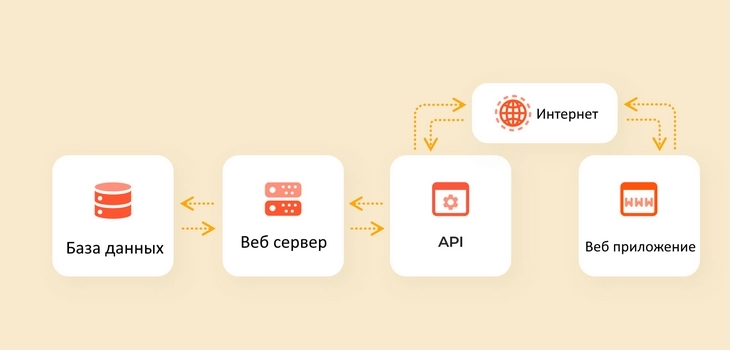

[Источник](https://apiguy.co.uk/2017/12/12/what-does-api-mean-what-are-the-benefits-of-apis-and-why-are-apis-important-to-app-development/)

**Задача:** получить и проанализировать данные из [iTunes Search API](https://developer.apple.com/library/archive/documentation/AudioVideo/Conceptual/iTuneSearchAPI/Searching.html#//apple_ref/doc/uid/TP40017632-CH5-SW1), которое позволяет искать музыку, фильмы, книги и т.д. в магазинах Apple.

In [ ]:
# Импортируем библиотеку requests для отправки HTTP-запросов
import requests

# Формируем URL для запроса к API
# Будем искать треки исполнителя Ed Sheeran в российском iTunes Store, ограничим результат 50 треками
# Параметры передаются прямо в URL после знака '?' в виде 'ключ=значение' и разделяются '&'
base_url = "https://itunes.apple.com/search"
params = {
    'term': 'эд+ширан', # Что ищем
    'attribute': 'artistTerm',  # Ищем только по в именах
    'country': 'ru',      # В каком магазине
    'media': 'music',     # Искать только музыку
    'limit': 200          # Максимальное количество результатов
}

# Отправляем GET-запрос к API
response = requests.get(base_url, params=params) # Передаём параметры

# Получаем данные в формате JSON
itunes_data = response.json()
itunes_data

## Ваши вопросы

# Вывод

Списки хороши для упорядоченных коллекций, словари – для пар ключ-значение, а множества – в случае, если нужна коллекция уникальных элементов, и порядок их не важен.

# Итоги

- Познакомились со структурами данных (списками, словарями, множествами) в Python.
- Рассмотрели принципы работы с list, dict и set comprehensions и их преимущества.
- Научились работать со словарями, списками и множествами для решения практических задач.

📚 Дополнительные материалы:
- [Полный гайд по List Comprehensions в Python
](https://pythontalk.olegtalks.ru/python-list-comprehensions-guide)
- [Как получить ключ с максимальным значением в Python-словаре](https://olegtalks.ru/tpost/t81v7aeum1-kak-poluchit-klyuch-s-maksimalnim-znache)
- [Руководство по словарным включениям в Python
](https://olegtalks.ru/tpost/1jzrbjizd1-rukovodstvo-po-slovarnim-vklyucheniyam-v)
- [Ультимативный гайд по структурам данных и алгоритмам на Python. Часть 1: встроенный арсенал](https://olegtalks.ru/tpost/pn9f6hjsh1-ultimativnii-gaid-po-strukturam-dannih-i)
- [Set comprehensions в Python: как и когда их использовать](https://olegtalks.ru/tpost/epvprzko41-set-comprehensions-v-python-kak-i-kogda)